In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [25]:
df = pd.read_csv('./USDT.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%b %d, %Y')

df = df.sort_values(by='Date', ascending=True)
print(df)
df1=df.reset_index()['Price']

           Date   Price    Open    High     Low     Vol. Change %
2022 2017-12-01  1.0100  1.0100  1.0100  1.0000  457.32K    0.00%
2021 2017-12-02  0.9959  1.0100  1.0100  0.9826  970.82K   -1.40%
2020 2017-12-03  0.9977  0.9959  0.9980  0.9840    1.30M    0.18%
2019 2017-12-04  1.0000  0.9977  1.0000  0.9860    2.91M    0.23%
2018 2017-12-05  1.0000  1.0000  1.0000  0.9850    1.74M    0.00%
...         ...     ...     ...     ...     ...      ...      ...
4    2023-06-12  1.0000  1.0002  1.0010  0.9999  111.56M   -0.03%
3    2023-06-13  0.9999  1.0000  1.0009  0.9999   80.35M    0.00%
2    2023-06-14  0.9998  0.9999  1.0008  0.9995   96.43M   -0.01%
1    2023-06-15  0.9993  0.9998  1.0008  0.9964  231.70M   -0.05%
0    2023-06-16  0.9999  0.9993  1.0007  0.9993   40.82M    0.06%

[2023 rows x 7 columns]


In [26]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [28]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (203, 1)


In [29]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (606, 1)
Validate shape: (204, 1)


In [30]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [33]:
# 8. Define LSTM Model

model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
18/18 [==============================] - 15s 326ms/step - loss: 0.0533 - val_loss: 0.0014
Epoch 2/200
18/18 [==============================] - 4s 231ms/step - loss: 0.0069 - val_loss: 8.3801e-05
Epoch 3/200
18/18 [==============================] - 5s 275ms/step - loss: 0.0050 - val_loss: 3.1738e-05
Epoch 4/200
18/18 [==============================] - 4s 234ms/step - loss: 0.0044 - val_loss: 8.9876e-05
Epoch 5/200
18/18 [==============================] - 5s 275ms/step - loss: 0.0040 - val_loss: 1.2774e-04
Epoch 6/200
18/18 [==============================] - 4s 233ms/step - loss: 0.0039 - val_loss: 1.0304e-04
Epoch 7/200
18/18 [==============================] - 4s 237ms/step - loss: 0.0036 - val_loss: 2.3241e-05
Epoch 8/200
18/18 [==============================] - 5s 291ms/step - loss: 0.0033 - val_loss: 2.4223e-05
Epoch 9/200
18/18 [==============================] - 4s 234ms/step - loss: 0.0031 - val_loss: 3.1177e-05
Epoch 10/200
18/18 [==============================] - 4s 2

In [35]:
def evaluate_bi_lstm_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

In [36]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_bi_lstm_model(yval, X_val)

4/4 [==============================] - 2s 35ms/step


In [37]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_bi_lstm_model(ytest, X_test)

16/16 [==============================] - 1s 39ms/step


In [38]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 1s 40ms/step


In [40]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=143
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.62468514 0.62216625 0.62468514 0.62468514 0.62216625 0.62342569
 0.62342569 0.62342569 0.62342569 0.62342569 0.62216625 0.62468514
 0.62216625 0.62342569 0.62216625 0.62216625 0.62342569 0.62342569
 0.62468514 0.62846348 0.62594458 0.62342569 0.62342569 0.62468514
 0.62342569 0.62594458 0.62216625 0.62468514 0.62216625 0.62342569
 0.62342569 0.62468514 0.62342569 0.62216625 0.62342569 0.62342569
 0.62216625 0.62342569 0.62216625 0.62216625 0.6209068  0.6209068
 0.6209068  0.62342569 0.66372796 0.70780856 0.71032746 0.67380353
 0.65869018 0.6675063  0.64735516 0.64483627 0.64105793 0.64357683
 0.64231738 0.64105793 0.64105793 0.63476071 0.63476071 0.62972292
 0.63098237 0.62468514 0.62342569 0.6209068  0.62216625 0.62342569
 0.62468514 0.62216625 0.62216625 0.62342569 0.6209068  0.62342569
 0.62342569 0.6209068  0.62594458 0.62216625 0.62594458 0.62594458
 0.63224181 0.62972292 0.62594458 0.62342569 0.62720403 0.62594458
 0.62846348 0.62468514 0.62468514 0.62594458 0.6246

In [41]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.000129  0.006076  0.009387  0.011338
Test      0.000032  0.004928  0.007898  0.005638


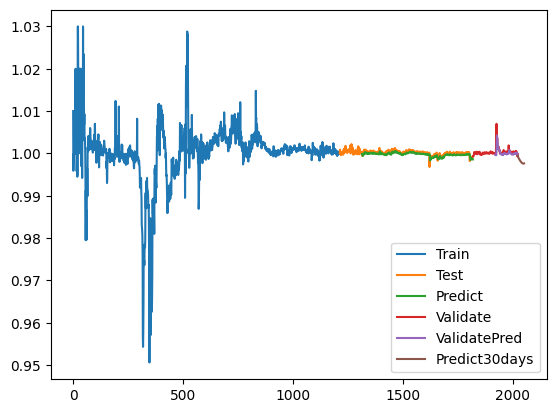

In [42]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [43]:
scaler.inverse_transform(lst_output)

array([[0.99940958],
       [0.99928706],
       [0.99916728],
       [0.99905269],
       [0.99894442],
       [0.9988427 ],
       [0.99874619],
       [0.99865411],
       [0.99856561],
       [0.99848001],
       [0.9983968 ],
       [0.99831591],
       [0.99823656],
       [0.99815969],
       [0.99808503],
       [0.99801354],
       [0.99794574],
       [0.99788205],
       [0.99782342],
       [0.99777026],
       [0.9977225 ],
       [0.99768171],
       [0.99764879],
       [0.99762391],
       [0.99760721],
       [0.99759924],
       [0.99759923],
       [0.99760805],
       [0.99762412],
       [0.99764746]])